<a href="https://colab.research.google.com/github/PabloPassarini/SuperStore_Teste/blob/main/Teste_BeTalent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autor: Pablo de Oliveira Passarini
Teste Prático BeTalent

## 📌 Instalação de Dependências

Para garantir o funcionamento correto do código, é necessário instalar algumas bibliotecas no Google Colab. Abaixo estão as principais dependências utilizadas e seus respectivos comandos de instalação.

### 📦 Bibliotecas Utilizadas

- **matplotlib**: Biblioteca para visualização de dados, permitindo a criação de gráficos.
- **seaborn**: Extensão do Matplotlib, facilita a criação de gráficos mais sofisticados.
- **kagglehub**: Usada para acessar e carregar datasets diretamente do Kaggle.
- **os**: Módulo embutido no Python para manipulação do sistema de arquivos.
- **pandas**: Essencial para manipulação e análise de dados tabulares.
- **numpy**: Biblioteca de computação numérica eficiente, usada para manipulação de arrays e cálculos matemáticos.
- **scikit-learn (sklearn)**:
  - **train_test_split**: Divide os dados em conjuntos de treino e teste.
  - **RandomForestRegressor**: Modelo de aprendizado de máquina baseado em árvores de decisão.
  - **mean_absolute_error, mean_squared_error**: Métricas para avaliar o desempenho do modelo.
  - **MinMaxScaler**: Técnica de normalização dos dados, escalando os valores para um intervalo específico.

### ⚙️ Comando de Instalação  

No Google Colab, algumas dessas bibliotecas já vêm instaladas por padrão. No entanto, para garantir que todas estejam disponíveis, utilize o seguinte comando:

In [ ]:
!pip install kagglehub pandas numpy matplotlib seaborn scikit-learn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub, os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [ ]:
path = kagglehub.dataset_download("jacopoferretti/superstore-dataset")

100%|██████████| 550k/550k [00:00<00:00, 1.32MB/s]

Extracting files...


In [ ]:
df = pd.read_csv(os.path.join(path, "Sample - Superstore.csv"), encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


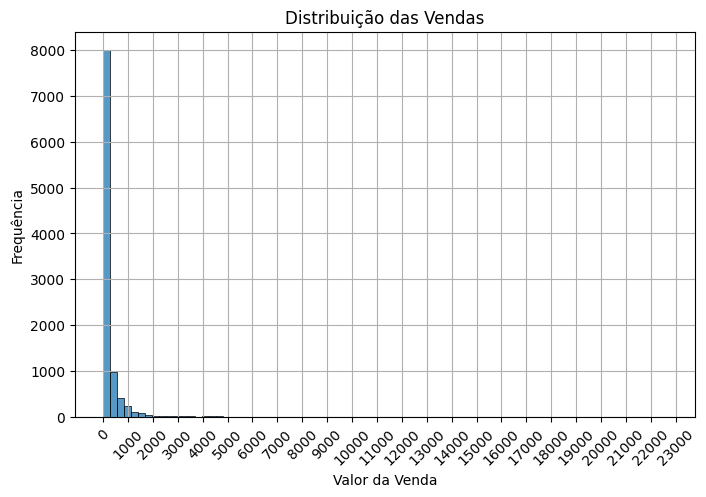

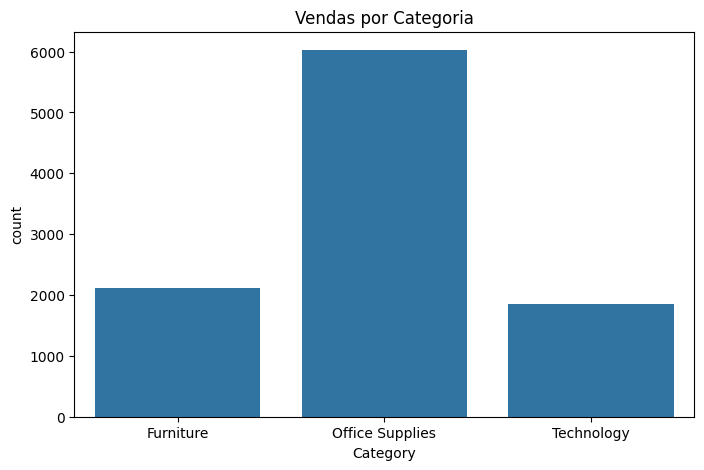

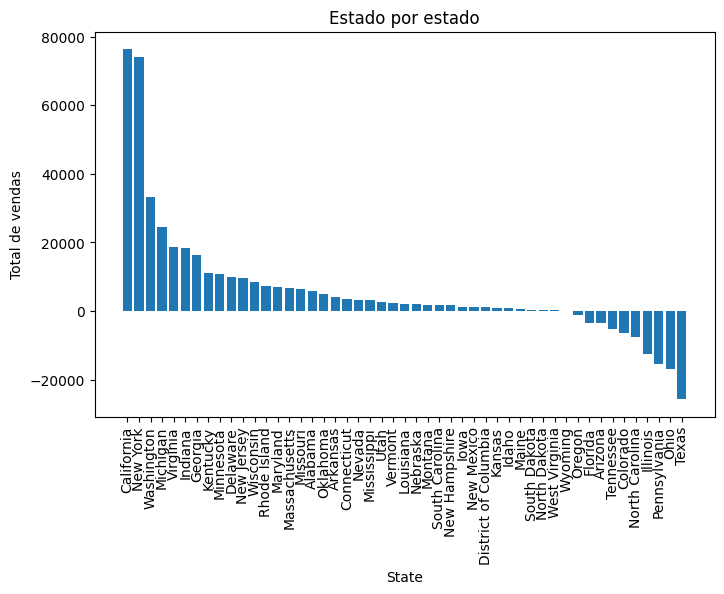

In [ ]:
"""
Visualizando distribuição das vendas
vendas por categoria
vendas por estado
"""



plt.figure(figsize=(8,5))

# Histograma com mais bins
sns.histplot(df['Sales'], bins=80)

plt.title('Distribuição das Vendas')
plt.xlabel('Valor da Venda')
plt.ylabel('Frequência')

# Personalizando o eixo X para ter mais divisões
max_value = df['Sales'].max()  # Pegamos o maior valor de venda
step = 1000  # Define o intervalo entre os ticks (ajuste se necessário)
plt.xticks(np.arange(0, max_value + step, step), rotation=45)  # Cria os ticks com espaçamento fixo
plt.grid(True)
plt.show()


# Gráfico de barras por categoria
plt.figure(figsize=(8,5))
sns.countplot(x=df['Category'])
plt.title('Vendas por Categoria')
plt.show()



vendas_est = df.groupby('State')['Profit'].sum().reset_index()
vendas_est = vendas_est.sort_values(by='Profit', ascending=False) #Deixando em ordem crescente
plt.figure(figsize=(8, 5))
plt.bar(vendas_est['State'], vendas_est['Profit'])
plt.title('Estado por estado')
plt.xlabel('State')
plt.ylabel('Total de vendas')
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.show()


## 📊 Análise Inicial dos Dados  

A partir dos dois primeiros gráficos, podemos extrair os seguintes insights:  

### 🔹 Distribuição das Vendas  
- Observamos que a maioria das vendas corresponde a produtos de **menor valor**, na faixa entre **$0.44 e $500**.  

### 🔹 Categoria Mais Vendida  
- A categoria **Office Supplies** (*Materiais de Escritório*) é a mais comercializada, superando as demais.  

### 🔹 Regiões com Maior Número de Vendas  
- Os estados com **maior volume de vendas** são:  
  - 📍 **Califórnia**  
  - 📍 **Nova York**  
  - 📍 **Washington**  

Essas informações iniciais ajudam a direcionar análises mais detalhadas sobre padrões de compra e estratégias de otimização. 🚀


In [ ]:
def prever_Vendas(df, estado=False, n_est=100):
    # Se um estado for especificado, filtrar os dados
    if estado:
        df = df[df['State'] == estado]

    df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convertendo as datas de venda para datetime
    # Agrupando as datas por data, ou seja, todas as vendas feitas no mesmo dia serão combinadas
    # Além disso, foi adicionado a media dos descontos desses dias, ja que os descontos podem influenciar no numero de vendas
    df_vendas = df.groupby('Order Date').agg({'Sales': 'sum', 'Discount': 'mean'}).reset_index()

    # Separando as datas
    df_vendas['Ano'] = df_vendas['Order Date'].dt.year
    df_vendas['Mes'] = df_vendas['Order Date'].dt.month
    df_vendas['Dia'] = df_vendas['Order Date'].dt.day
    df_vendas['Dia da Semana'] = df_vendas['Order Date'].dt.dayofweek

    # Definindo a matriz de entrada e o vetor alvo
    X = df_vendas[['Ano', 'Mes', 'Dia', 'Dia da Semana', 'Discount']]
    y = df_vendas['Sales']

    # Normalizando os dados
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_normalized = scaler_X.fit_transform(X)
    y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

    # Separando porções de dados para treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

    # Criando e treinando o modelo
    model = RandomForestRegressor(n_estimators=n_est, random_state=42)
    model.fit(X_train, y_train.ravel())

    # Fazendo previsões
    y_pred_normalized = model.predict(X_test)

    # Desnormalizando as previsões e os valores reais
    y_pred = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1))
    y_test = scaler_y.inverse_transform(y_test)

    # Avaliando o aprendizado do modelo
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse, X_test, y_test, y_pred

def plotar_resultados(y_test, y_pred, n_amostras=30):
    plt.figure(figsize=(10, 5))

     # Selecionando as primeiras n_amostras para o gráfico
    y_test_plot = y_test[:n_amostras]
    y_pred_plot = y_pred[:n_amostras]

    # Plotando os resultados
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_plot, label="Vendas Reais", marker='o')
    plt.plot(y_pred_plot, label="Vendas Previstas", linestyle="dashed", marker='s')
    plt.xlabel("Amostras")
    plt.ylabel("Vendas")
    plt.title("Vendas Reais vs. Vendas Previstas")
    plt.legend()
    plt.grid(True)
    plt.show()



<Figure size 1000x500 with 0 Axes>

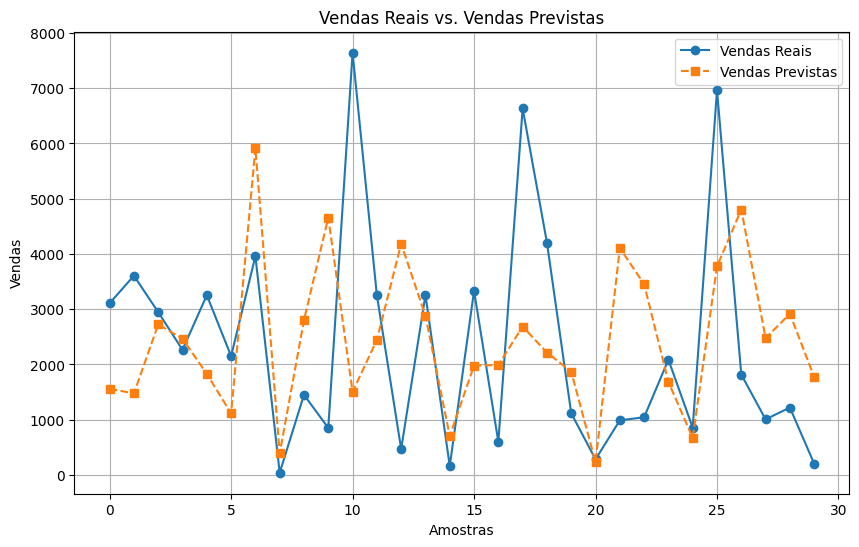

In [ ]:
mae_geral, mse_geral, rmse_geral, X_test_geral, y_test_geral, y_pred_geral = prever_Vendas(df, n_est=100)
plotar_resultados(y_test_geral, y_pred_geral)

# 📊 Análise do Gráfico: Desempenho do Modelo de Previsão de Vendas


---


1️⃣ Tendência Geral Capturada 📈
O modelo consegue acompanhar a tendência geral das vendas, com previsões que seguem a oscilação dos valores reais. Isso indica que ele capta bem padrões sazonais de curto prazo.

2️⃣ Dificuldade em Prever Picos de Venda ⚠️

Em momentos de alta demanda (como nas amostras 10, 17 e 25), as previsões ficaram significativamente abaixo dos valores reais. Isso sugere que o modelo pode não estar capturando bem eventos excepcionais, como promoções, sazonalidades ou outras influências externas.

3️⃣ Tendência à Subestimação 🔽

O modelo apresenta uma tendência de prever valores menores do que os reais, o que pode indicar que ele está sendo conservador demais nas estimativas ou que os dados históricos utilizados no treinamento não refletem bem variações abruptas.

4️⃣ Padrão de Oscilação Bem Representado 🔄

Apesar das diferenças de magnitude, o modelo consegue replicar o comportamento das oscilações de venda ao longo do tempo. Esse alinhamento sugere que ele capta bem a dinâmica do mercado, mas precisa de ajustes para melhorar a precisão dos valores.

5️⃣ Previsões Acuradas em Algumas Amostras ✅

Há vários momentos em que as previsões foram bastante próximas dos valores reais, como nas amostras 2, 3, 7, 14, 20, 23 e 24. Isso indica que o modelo tem potencial e pode ser refinado para melhorar sua acurácia geral.


---


🔍 Próximos Passos para Melhorar o Modelo

📌 Revisão dos Dados de Entrada: Incluir mais variáveis relevantes, como descontos, eventos sazonais ou outros fatores que influenciem as vendas.

📌 Ajuste do Modelo: Testar hiperparâmetros diferentes e explorar outros algoritmos que possam lidar melhor com eventos extremos.

<ipython-input-33-7c9232a51fa5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convertendo as datas de venda para datetime


<Figure size 1000x500 with 0 Axes>

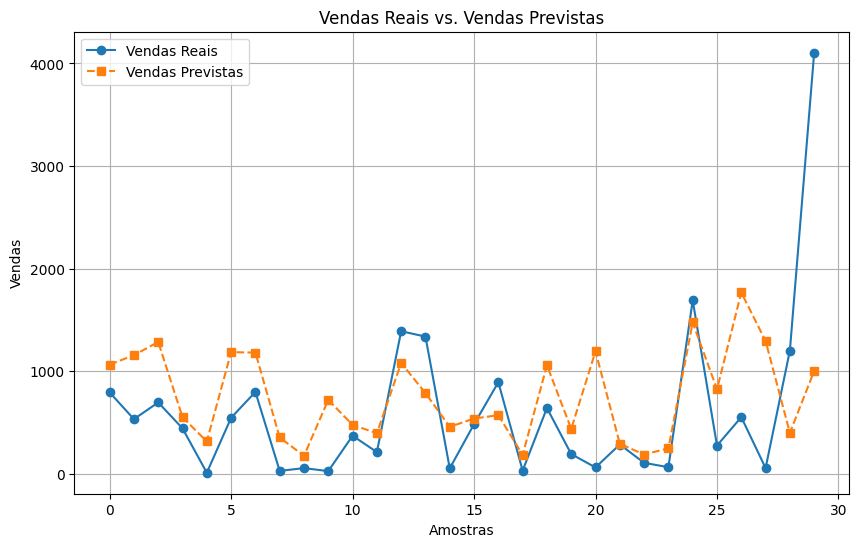

In [ ]:
mae_calif, mse_calif, rmse_calif, X_test_calif, y_test_calif, y_pred_calif = prever_Vendas(df, estado='California',n_est=100)
plotar_resultados(y_test_calif, y_pred_calif)

# 🌟 Extra: Previsão de Vendas para a Califórnia
Como um experimento adicional, decidi realizar uma previsão de vendas especificamente para o estado da Califórnia. Durante a análise exploratória dos dados, identifiquei que essa foi uma das regiões com maior volume de vendas.

Ao focar em uma localização mais específica, a Superstore poderia otimizar suas estratégias de vendas e tomada de decisão. Além disso, esse tipo de abordagem pode ser replicado para outras cidades de alto desempenho.

Uma previsão que engloba diversas localidades pode perder precisão, pois cada região possui características e demandas distintas. Portanto, ao segmentar a análise por localidade, conseguimos obter insights mais relevantes e previsões mais ajustadas à realidade de cada mercado.


---

🔍 Análise da Previsão Local

Ao observar esse gráfico, podemos notar que as previsões estão significativamente mais próximas dos valores reais em comparação com a previsão geral. Embora ainda existam discrepâncias nos picos de vendas, a diferença foi consideravelmente reduzida.

Isso indica que a previsão local trouxe resultados mais precisos, melhorando a capacidade do modelo de capturar padrões específicos da região. Dessa forma, o estabelecimento pode tomar decisões mais informadas sobre logística e marketing, alinhando suas estratégias de forma mais eficiente com a demanda real.